In [1]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.10 (Ootpa)

Matrix products: default
BLAS/LAPACK: /scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/libopenblasp-r0.3.23.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.35   IRdisplay_1.1   utf8_1.2.4      base64enc_0.1-3
 [5] fastmap_1.1.1   glue_1.7.0      htmltools_0.5.7 repr_1.1.6     
 [9] lifecycle_1.0.4 cli_3.6.2       

In [21]:
fig.size <- function (height, width, res=300) {
    options(repr.plot.height = height, repr.plot.width = width, resolution=res)
}

In [30]:
suppressPackageStartupMessages({
    library(msigdbr)
    library(DOSE)
    library(dplyr)
    #library(ReactomePA)'
    library(ggplot2)
    library(clusterProfiler)
    library(ComplexHeatmap)
    library(circlize)
})

In [3]:
homo_de = readRDS('new_5_homo_samples_annotated_DE.rds')

In [7]:
hemi_de = readRDS('new_5_hemi_samples_annotated_DE.rds')

In [8]:
homo_de  %>% mutate(sign_up = sign(avg_log2FC)) %>% head

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene,sign_up
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>
Trbc1,0,9.927464,0.389,0.003,0,Mesenchymal cells,Trbc1,1
Trbc2,0,9.890966,0.695,0.006,0,Mesenchymal cells,Trbc2,1
Cd3e,0,9.768496,0.329,0.002,0,Mesenchymal cells,Cd3e,1
Trac,0,9.702105,0.467,0.004,0,Mesenchymal cells,Trac,1
Cd3g,0,9.689046,0.506,0.004,0,Mesenchymal cells,Cd3g,1
Skap1,0,9.573156,0.400,0.003,0,Mesenchymal cells,Skap1,1


In [9]:
de_ko_wt_up_homo = homo_de %>% 
    filter(p_val_adj < 0.05) %>% 
    filter(avg_log2FC > 0.1)

In [10]:
de_ko_wt_up_hemi = hemi_de %>% 
    filter(p_val_adj < 0.05) %>% 
    filter(avg_log2FC > 0.1)

In [18]:
#genesets = msigdbr(species = "mouse", category = "C2", subcategory = "CGP")
m_t2g <- msigdbr::msigdbr(species = species, category = "C5", subcategory = 'GO:BP') %>% 
          dplyr::select(gs_name, gene_symbol) %>% distinct()
enrich_all_c6 <- compareCluster(gene_name_list, enricher, TERM2GENE=m_t2g, 
                             pvalueCutoff=0.05)

In [19]:
enrich_all_c6 %>% data.frame

Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
Mesenchymal cells,GOBP_RNA_SPLICING,GOBP_RNA_SPLICING,23/232,392/15653,2.063456e-08,5.604346e-05,0.0000464169,Hnrnpl/Thrap3/Paxbp1/Acin1/Zc3h13/Ddx46/Taf15/Rbm25/Prpf4b/Smndc1/Ptbp1/Ppp4r2/Rp9/Tra2a/Srpk1/Prpf38b/Luc7l2/Son/Tra2b/Srsf5/Srrm2/Fus/Rbm39,23
Mesenchymal cells,GOBP_MRNA_PROCESSING,GOBP_MRNA_PROCESSING,23/232,452/15653,2.724403e-07,3.699739e-04,0.0003064236,Hnrnpl/Thrap3/Paxbp1/Acin1/Zc3h13/Ddx46/Rbm25/Prpf4b/Smndc1/Ptbp1/Rbbp6/Ppp4r2/Xrn2/Tra2a/Srpk1/Cdk11b/Prpf38b/Luc7l2/Son/Tra2b/Srsf5/Srrm2/Rbm39,23
Mesenchymal cells,GOBP_THYMIC_T_CELL_SELECTION,GOBP_THYMIC_T_CELL_SELECTION,6/232,22/15653,6.079130e-07,5.503639e-04,0.0004558281,Cd3e/Cd3g/Cd3d/Cd28/Ptprc/Ccr7,6
Mesenchymal cells,GOBP_MONONUCLEAR_CELL_DIFFERENTIATION,GOBP_MONONUCLEAR_CELL_DIFFERENTIATION,21/232,427/15653,1.594758e-06,1.082840e-03,0.0008968413,Cd3e/Cd3g/Cd3d/Cd28/Il7r/Lck/Tcf7/Cd2/Lef1/Ptprc/Ccr7/B2m/H2-D1/Itgb1/Acin1/Trp53/Hectd1/Yy1/Irf2bp2/Jun/Rhoa,21
Mesenchymal cells,GOBP_T_CELL_DIFFERENTIATION_IN_THYMUS,GOBP_T_CELL_DIFFERENTIATION_IN_THYMUS,9/232,78/15653,2.217439e-06,1.204513e-03,0.0009976139,Cd3e/Cd3g/Cd3d/Cd28/Il7r/Ptprc/Ccr7/B2m/Trp53,9
Mesenchymal cells,GOBP_VIRAL_PROCESS,GOBP_VIRAL_PROCESS,20/232,410/15653,3.229846e-06,1.462044e-03,0.0012109089,Cd28/Lef1/Selplg/Itgb1/Rsf1/Trp53/Pcbp2/Mphosph8/Ddx3x/Gtf2b/Snx3/Mcts1/Ddx6/Ptbp1/Vps28/Srpk1/Chmp4b/Jun/Ppib/Cdc42,20
Mesenchymal cells,GOBP_HISTONE_MODIFICATION,GOBP_HISTONE_MODIFICATION,22/232,490/15653,3.953889e-06,1.534109e-03,0.0012705957,Lef1/Gatad2a/Smad4/Tbl1x/Paxbp1/Wac/Trp53/Suds3/Brd1/Arid4b/Taf10/Gtf2b/Rtf1/Kdm6b/Sin3b/Atrx/Ash1l/Kmt2a/Kmt2e/Ppp4r2/Ctcf/Chd3,22
Mesenchymal cells,GOBP_RNA_SPLICING_VIA_TRANSESTERIFICATION_REACTIONS,GOBP_RNA_SPLICING_VIA_TRANSESTERIFICATION_REACTIONS,16/232,284/15653,5.353502e-06,1.638353e-03,0.0013569338,Hnrnpl/Thrap3/Paxbp1/Ddx46/Rbm25/Prpf4b/Smndc1/Ptbp1/Tra2a/Srpk1/Luc7l2/Son/Tra2b/Srsf5/Srrm2/Rbm39,16
Mesenchymal cells,GOBP_IN_UTERO_EMBRYONIC_DEVELOPMENT,GOBP_IN_UTERO_EMBRYONIC_DEVELOPMENT,19/232,388/15653,5.429005e-06,1.638353e-03,0.0013569338,Lef1/Ptpn18/Klf2/Itgb1/Cul3/Emg1/Smad4/Trp53/Gpi1/Rtf1/Zfand5/Hectd1/Dad1/Bptf/Birc6/Rbbp6/Tmed2/Grb2/Cited2,19


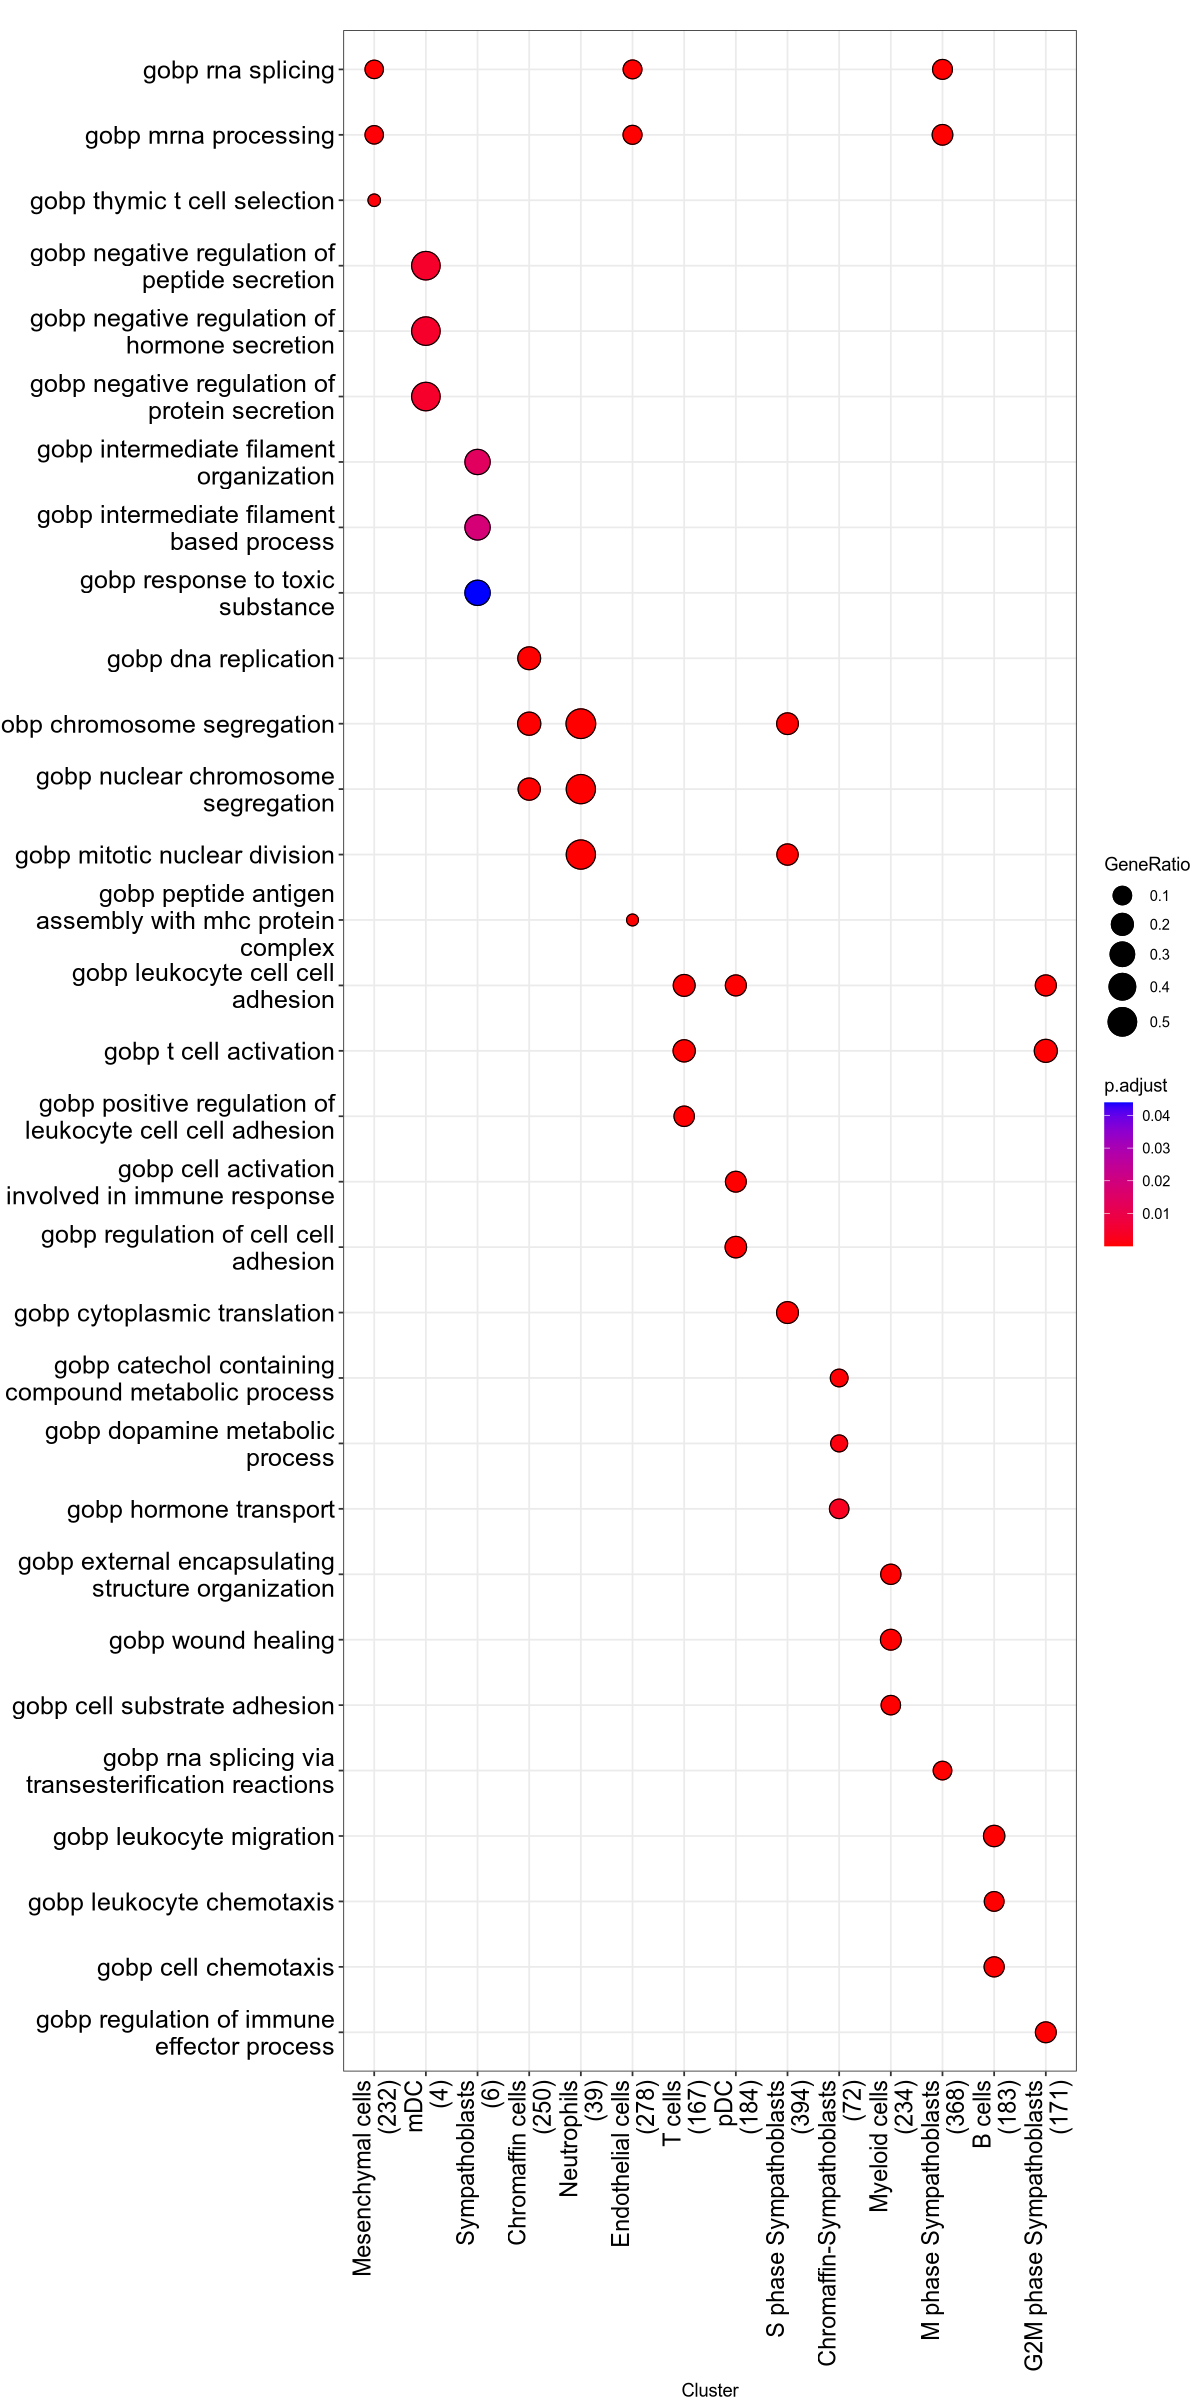

In [29]:
fig.size(20,10)
enrich_df <- as.data.frame(enrich_all_c6)

# Function to get top 5 pathways per cluster
get_top_5_per_cluster <- function(df) {
  df %>% 
    group_by(Cluster) %>% 
    arrange(p.adjust) %>% 
    slice_head(n = 3)
}

# Apply the function to get top 5 pathways per cluster
top_5_per_cluster <- get_top_5_per_cluster(enrich_df)

# Create a new compareClusterResult object for the top pathways
top_ids <- top_5_per_cluster$ID
top_results <- enrich_all_c6[top_ids]

# Ensure the top_results is still a compareClusterResult object
top_compareClusterResult <- enrich_all_c6
top_compareClusterResult@compareClusterResult <- top_5_per_cluster

top_compareClusterResult@compareClusterResult$Description <- gsub("^GOBP ", "", top_compareClusterResult@compareClusterResult$Description)
top_compareClusterResult@compareClusterResult$Description <- tolower(top_compareClusterResult@compareClusterResult$Description)

# Plot the top pathways using dotplot
dotplot(top_compareClusterResult) + 
  theme_bw() + 
  geom_point(shape=21, color="black") + 
  theme(legend.position = "right", 
        axis.text = element_text(color="black"), 
        axis.text.x = element_text(size=14, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(size=15),
        plot.margin = margin(0,0,0,0,'pt')) + 
  paletteer::scale_fill_paletteer_c("grDevices::Heat" , direction = -1)

In [33]:
data.frame(top_compareClusterResult) %>% head

,Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,Mesenchymal cells,GOBP_RNA_SPLICING,gobp_rna_splicing,23/232,392/15653,2.063456e-08,5.604346e-05,0.0000464169,Hnrnpl/Thrap3/Paxbp1/Acin1/Zc3h13/Ddx46/Taf15/Rbm25/Prpf4b/Smndc1/Ptbp1/Ppp4r2/Rp9/Tra2a/Srpk1/Prpf38b/Luc7l2/Son/Tra2b/Srsf5/Srrm2/Fus/Rbm39,23
2,Mesenchymal cells,GOBP_MRNA_PROCESSING,gobp_mrna_processing,23/232,452/15653,2.724403e-07,3.699739e-04,0.0003064236,Hnrnpl/Thrap3/Paxbp1/Acin1/Zc3h13/Ddx46/Rbm25/Prpf4b/Smndc1/Ptbp1/Rbbp6/Ppp4r2/Xrn2/Tra2a/Srpk1/Cdk11b/Prpf38b/Luc7l2/Son/Tra2b/Srsf5/Srrm2/Rbm39,23
3,Mesenchymal cells,GOBP_THYMIC_T_CELL_SELECTION,gobp_thymic_t_cell_selection,6/232,22/15653,6.079130e-07,5.503639e-04,0.0004558281,Cd3e/Cd3g/Cd3d/Cd28/Ptprc/Ccr7,6
4,mDC,GOBP_NEGATIVE_REGULATION_OF_PEPTIDE_SECRETION,gobp_negative_regulation_of_peptide_secretion,2/4,40/15653,3.808040e-05,4.543334e-03,0.0017555854,Chga/Sytl4,2
5,mDC,GOBP_NEGATIVE_REGULATION_OF_HORMONE_SECRETION,gobp_negative_regulation_of_hormone_secretion,2/4,60/15653,8.626583e-05,4.543334e-03,0.0017555854,Chga/Sytl4,2
6,mDC,GOBP_NEGATIVE_REGULATION_OF_PROTEIN_SECRETION,gobp_negative_regulation_of_protein_secretion,2/4,60/15653,8.626583e-05,4.543334e-03,0.0017555854,Chga/Sytl4,2


In [46]:
top_compareClusterResult <- enrich_all_c6
top_compareClusterResult@compareClusterResult <- top_5_per_cluster

In [47]:
top_compareClusterResult@compareClusterResult$Description = gsub("^GOBP_", "", top_compareClusterResult@compareClusterResult$Description)

In [48]:
top_compareClusterResult@compareClusterResult$Description = gsub("_", " ", top_compareClusterResult@compareClusterResult$Description)

In [49]:
top_compareClusterResult %>% data.frame %>% head

,Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,Mesenchymal cells,GOBP_RNA_SPLICING,RNA SPLICING,23/232,392/15653,2.063456e-08,5.604346e-05,0.0000464169,Hnrnpl/Thrap3/Paxbp1/Acin1/Zc3h13/Ddx46/Taf15/Rbm25/Prpf4b/Smndc1/Ptbp1/Ppp4r2/Rp9/Tra2a/Srpk1/Prpf38b/Luc7l2/Son/Tra2b/Srsf5/Srrm2/Fus/Rbm39,23
2,Mesenchymal cells,GOBP_MRNA_PROCESSING,MRNA PROCESSING,23/232,452/15653,2.724403e-07,3.699739e-04,0.0003064236,Hnrnpl/Thrap3/Paxbp1/Acin1/Zc3h13/Ddx46/Rbm25/Prpf4b/Smndc1/Ptbp1/Rbbp6/Ppp4r2/Xrn2/Tra2a/Srpk1/Cdk11b/Prpf38b/Luc7l2/Son/Tra2b/Srsf5/Srrm2/Rbm39,23
3,Mesenchymal cells,GOBP_THYMIC_T_CELL_SELECTION,THYMIC T CELL SELECTION,6/232,22/15653,6.079130e-07,5.503639e-04,0.0004558281,Cd3e/Cd3g/Cd3d/Cd28/Ptprc/Ccr7,6
4,mDC,GOBP_NEGATIVE_REGULATION_OF_PEPTIDE_SECRETION,NEGATIVE REGULATION OF PEPTIDE SECRETION,2/4,40/15653,3.808040e-05,4.543334e-03,0.0017555854,Chga/Sytl4,2
5,mDC,GOBP_NEGATIVE_REGULATION_OF_HORMONE_SECRETION,NEGATIVE REGULATION OF HORMONE SECRETION,2/4,60/15653,8.626583e-05,4.543334e-03,0.0017555854,Chga/Sytl4,2
6,mDC,GOBP_NEGATIVE_REGULATION_OF_PROTEIN_SECRETION,NEGATIVE REGULATION OF PROTEIN SECRETION,2/4,60/15653,8.626583e-05,4.543334e-03,0.0017555854,Chga/Sytl4,2


In [52]:
data_matrix <- top_compareClusterResult %>% data.frame %>%
  mutate(p.adjust = -log10(p.adjust)) %>%  # Convert p.adjust to -log10(p.adjust) for better color scaling
  select(Cluster, Description, p.adjust) %>%
  tidyr::spread(key = Cluster, value = p.adjust)

# Set the row names to the Description column
rownames(data_matrix) <- data_matrix$Description

# Remove the Description column (as it's now row names)
data_matrix <- data_matrix %>% select(-Description)

# Convert to a matrix
data_matrix <- as.matrix(data_matrix)

In [54]:
col_fun <- colorRamp2(c(0, 10, 20, 30), c("white", "pink", "red", "darkred"))

# Create the heatmap
ht <- Heatmap(data_matrix,
              name = "-log10(p.adjust)",
              col = col_fun,
              cluster_rows = FALSE,
              cluster_columns = FALSE,
              show_row_names = TRUE,
              show_column_names = TRUE,
              row_names_gp = gpar(fontsize = 10),
              column_names_gp = gpar(fontsize = 10, rot = 45),
              heatmap_legend_param = list(title = "-log10(p.adjust)",
                                          at = c(0, 10, 20, 30),
                                          labels = c("0", "10", "20", "30"))
)

# Draw the heatmap
draw(ht)

ERROR: Error in grid.Call.graphics(C_downvppath, name$path, name$name, strict): Viewport '-log10(p.adjust)_heatmap_body_1_1' was not found


In [56]:
saveRDS(data_matrix, 'msigdb.rds')

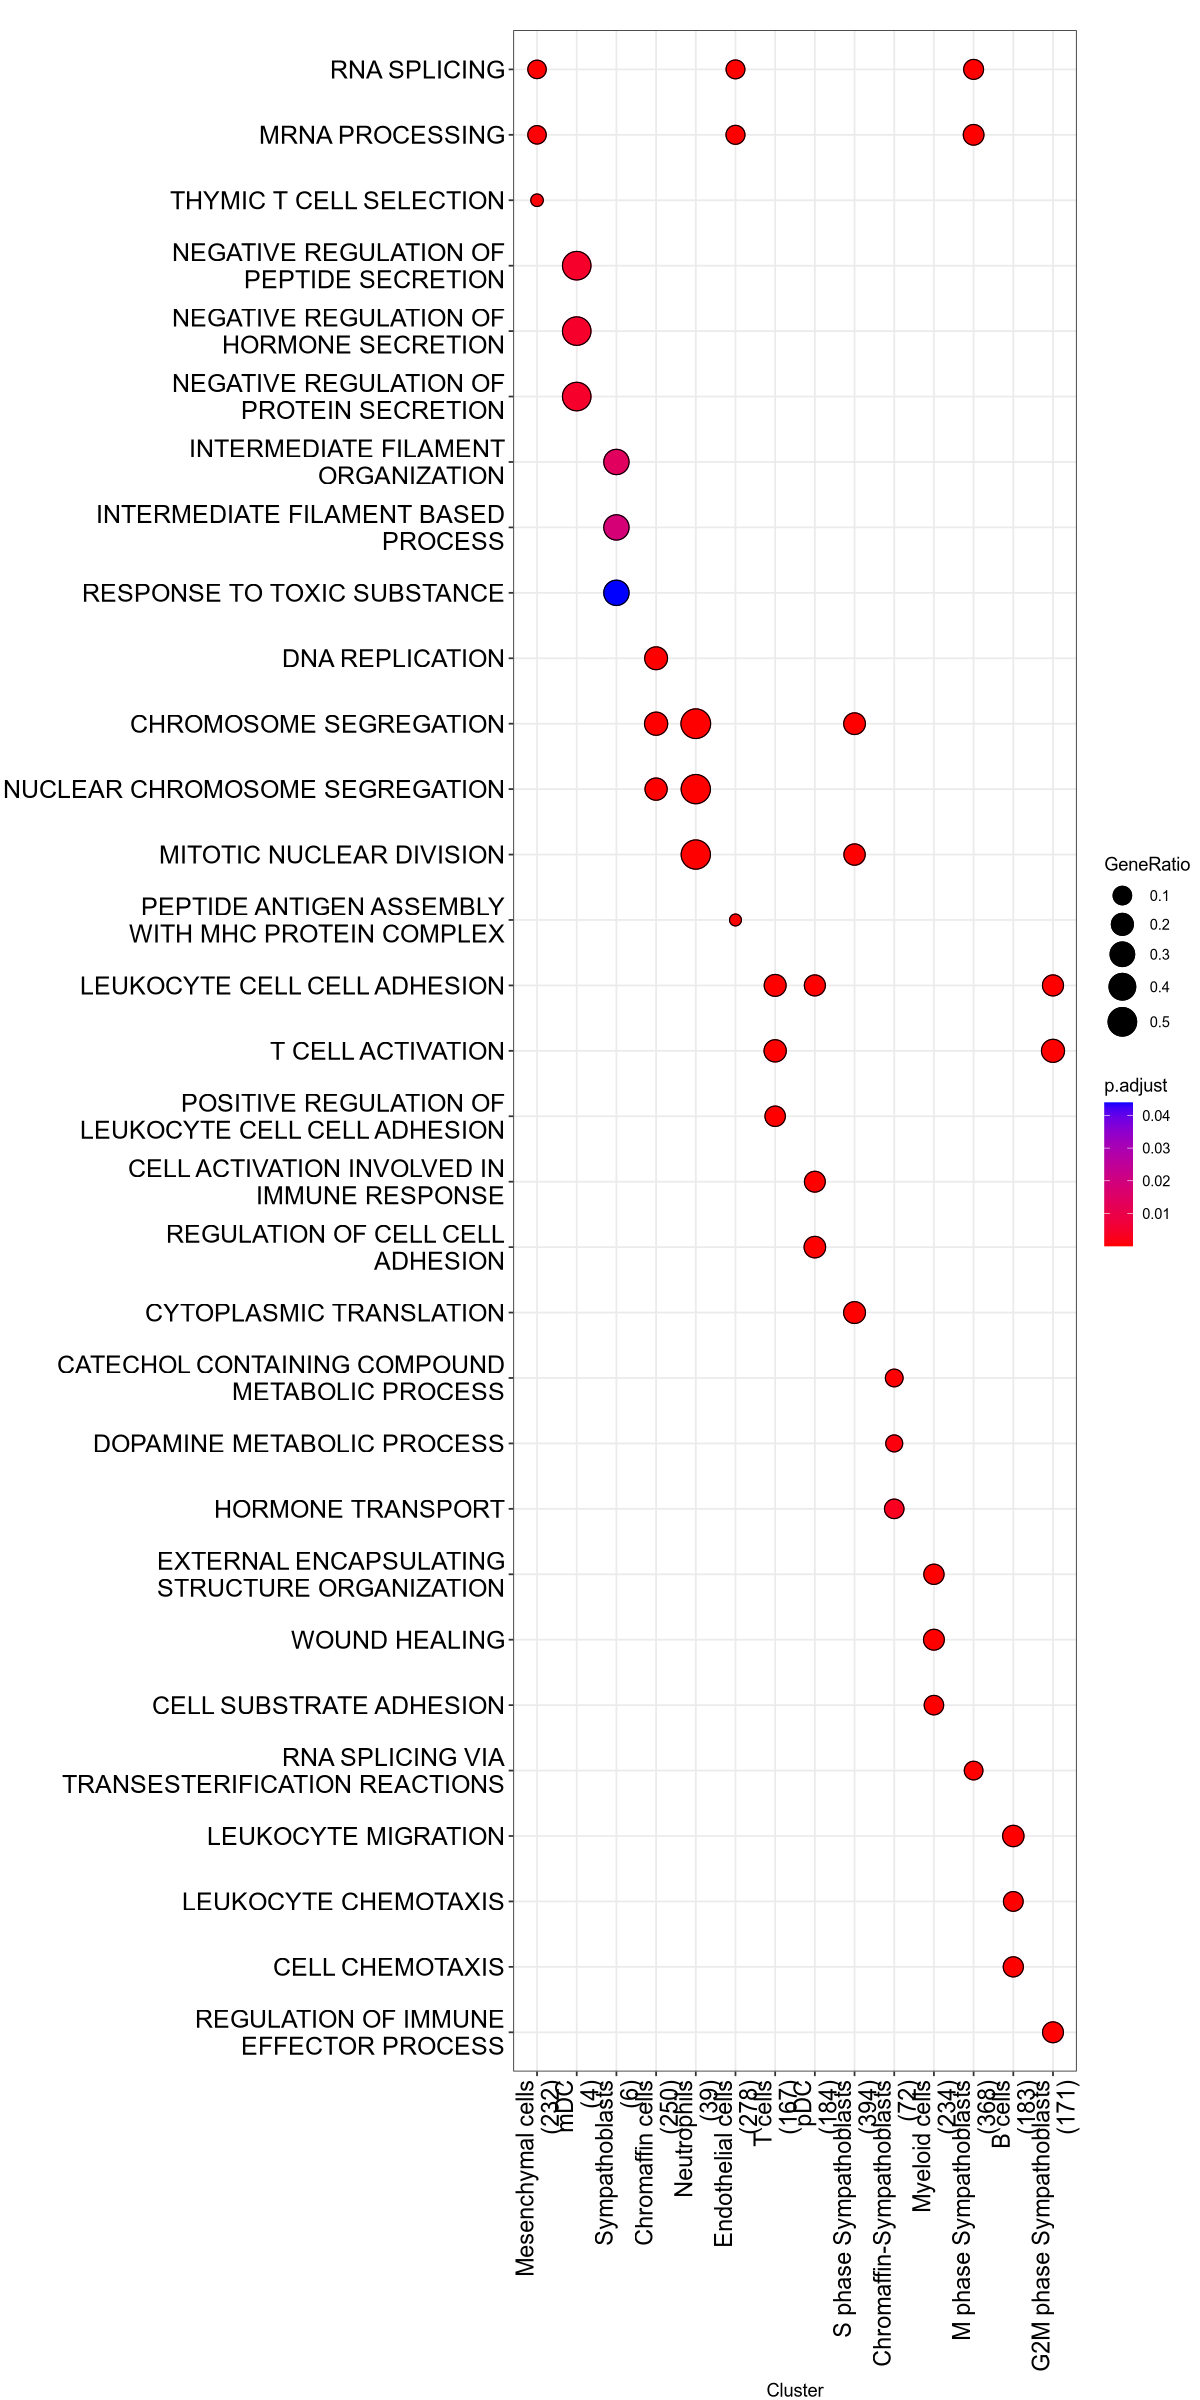

In [58]:
msigdbdot = dotplot(top_compareClusterResult) + 
  theme_bw() + 
  geom_point(shape=21, color="black") + 
  theme(legend.position = "right", 
        axis.text = element_text(color="black"), 
        axis.text.x = element_text(size=14, angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_text(size=15),
        plot.margin = margin(0,0,0,0,'pt')) + 
  paletteer::scale_fill_paletteer_c("grDevices::Heat" , direction = -1)
msigdbdot

In [61]:
fig.size(20,10)
ggsave(
     glue::glue('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
    'results/figures/2024/Figure_1/MSigDB_5-Homozygous_dotplot.pdf'),
    plot =msigdbdot, 
    height = 20,
    width = 12,
    create.dir=TRUE
      )
